# Estudio completo de un problema de ML con Python
### Estimación del precio de las casas de airbnb 

In [1]:
# importamos las librerias que necesitemos para el proyecto 
import numpy  as np  
import pandas as pd
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline

# forzamos que muestre todas las columnas
# pd.set_option('display.max_rows', None)

## ANALISIS EXPLORATORIO

### DIVIDIMOS LOS DATOS

In [ ]:
# cargamos los datos del fichero y los dividimos en train/test para poder hacer un analisis de ellos 

full_df = pd.read_csv("./data/airbnb-listings-extract.csv",sep=';')

# dividimos los datos
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# guardamos los datos en difirentes archivos 
train.to_csv('./data/airbnb-listings-extract_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb-listings-extract_test.csv', sep=';', decimal='.', index=False)

In [213]:
# cargamos el fichero y vemos su contenido
airbnb_data_train = pd.read_csv("./data/airbnb-listings-extract_train.csv",sep=';', decimal='.') 
airbnb_data_test = pd.read_csv("./data/airbnb-listings-extract_test.csv",sep=';', decimal='.') 
# airbnb_data.head(6).T

### ELIMINAMOS VARIABLES

In [214]:
# vamos a eliminar variables que no necesitemos bien por datos no relevantes como los nombres o las descripciones como los ids y otras variables (las que tenga dudas lo hare en la seleccion de caracteristicas)
# eliminamos campos como ciudad state o zipcode porque ademas de tener valores nulos, observamos que otras columnas tienen correlaciones con ellas aun asi dejo algunas que no tienen valores nulos aunque pueda ocurrir que al seleccionar las caracteristicas tengan correlacion y tenga que quitarlas

airbnb_data_train = airbnb_data_train.drop(['ID','Listing Url','Host URL', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
                                'XL Picture Url', 'Host ID', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood', 'Host Listings Count' ,
                                'Host Total Listings Count', 'Host Verifications', 'Neighbourhood','City', 'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market', 'Country', 'Amenities', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
                                'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
                                'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Reviews per Month', 'Features','Geolocation','Calculated host listings count','Street'], axis=1)


In [215]:
# al fijarnos en la variable que vamos a predecir(price) vemos que tiene valores nulos
# tiene los siguientes nulos 15 de un total de 11824
# al ser tan pocos eliminamos esas filas con null para que no nos afecte en la predicion
airbnb_data_train = airbnb_data_train.dropna(subset=['Price'])


### IMPUTAMOS 

In [216]:
# una vez quitadas las variables irrelevantes y las filas nulas de price, procedemos a imputar

#Bathrooms tiene los siguientes nulos 43 de un total de 11809, imputamos con la moda                         
airbnb_data_train['Bathrooms'].fillna(airbnb_data_train['Bathrooms'].mode()[0], inplace=True)

#Bedrooms tiene los siguientes nulos 20 de un total de 11809, imputamos con la moda       
airbnb_data_train['Bedrooms'].fillna(airbnb_data_train['Bedrooms'].mode()[0], inplace=True)

#Beds tiene los siguientes nulos 36 de un total de 11809, imputamos con la moda                              
airbnb_data_train['Beds'].fillna(airbnb_data_train['Beds'].mode()[0], inplace=True)


### BUSQUEDA DE OUTLIERS

In [217]:
# en la busqueda de outliers primero voy a utilizar un describe para ver las estadisticas y buscar pistas utiles y detectar valores atipicos
airbnb_data_train.describe()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365
count,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000
mean,40.485979,-3.784060,3.273605,1.282835,1.342027,2.043357,73.712592,1.580574,7.557710,3.110255,961.712677,8.943094,22.939453,39.792023,202.196799
std,4.695057,14.020002,2.088509,0.659375,0.900803,1.615993,71.624844,1.153438,11.160882,13.435761,9393.591785,9.332425,19.753442,29.649710,127.977302
min,-37.851182,-123.124429,1.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.409757,-3.707543,2.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000
50%,40.419315,-3.700771,3.000000,1.000000,1.000000,2.000000,55.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000
75%,40.430754,-3.683962,4.000000,1.000000,2.000000,2.000000,87.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000
max,55.966912,153.371427,16.000000,8.000000,10.000000,16.000000,969.000000,16.000000,276.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000


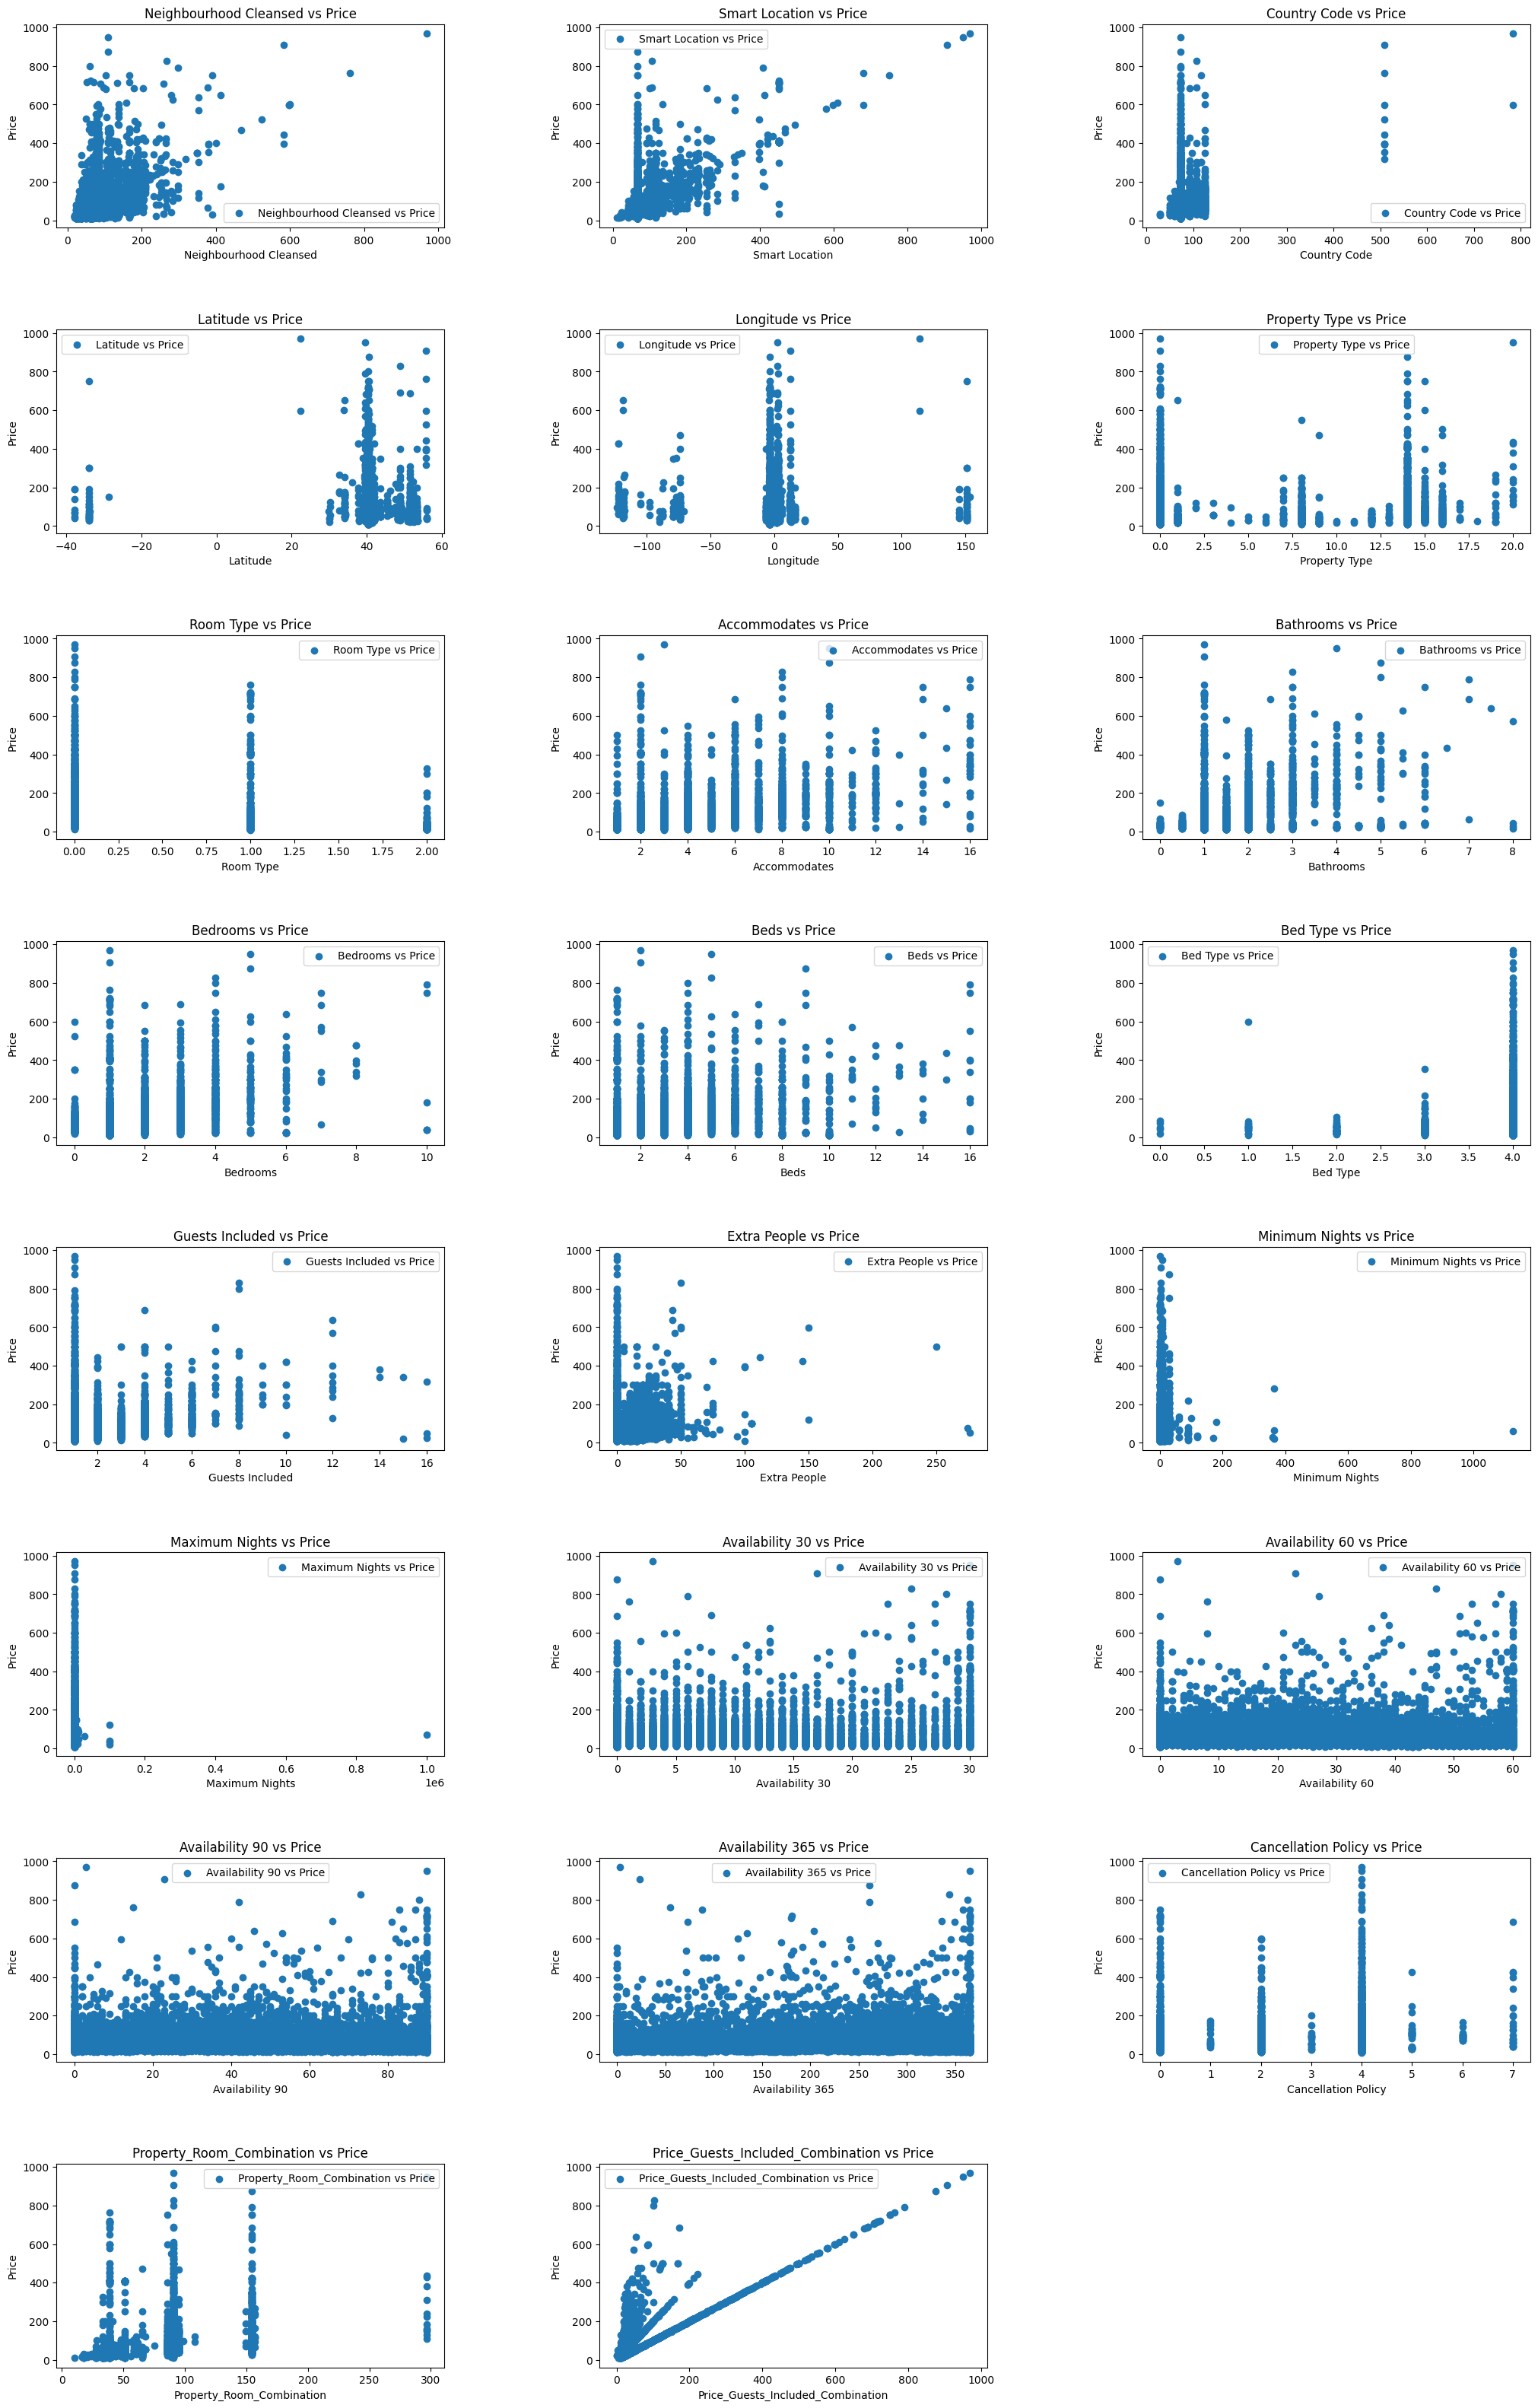

In [226]:
# posibles outliers Extra People <= 50 ,Bathrooms <= 6 , Minimum Nights <= 365, Maximum Nights <= 2000 , Bedrooms <= 7

# tambien no sirve esta grafica para ver las tendencias y ver cual pueden ser las caracteristicas mas importantes

###IMPORTANTE### 
# PARA HACER LAS GRAFICAS PRIMERO TENEMOS QUE CODIFICARLAS 

import math

# Creamos un cuadricula de scratter con subplots para ver todas las caracteristicas y ver si hay outliers

# eliminamos la columna price que es con la que compararemos
features = airbnb_data_train.columns.drop('Price');

# seleccionamos las columnas 
n_cols = 3
n_rows = math.ceil(len(features) / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))  # ajustamos altura
fig.subplots_adjust(hspace=0.5, wspace=0.4) # damos espacio entre los graficos
axes = axes.flatten() # aplanamos

# realizamos bucle para recorrer cada una de las caracteristicas y añadirlas al subplot
for i, col in enumerate(features):
    axes[i].scatter(airbnb_data_train[col], airbnb_data_train['Price'], label=f'{col} vs Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{col} vs Price')
    axes[i].legend()

# si hay mas ejes los eliminamos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# mostramos
plt.show()

### ELIMINACION DE OUTLIERS

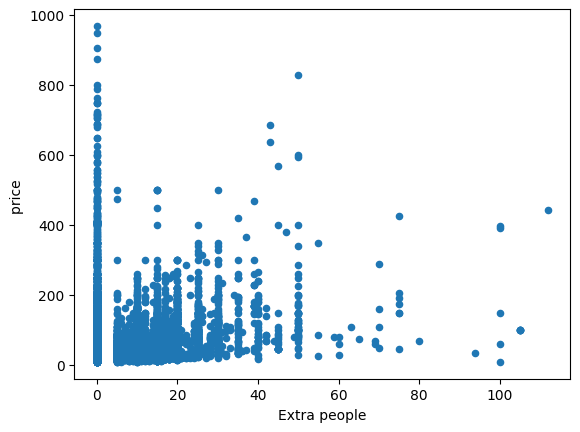

Original: 11809 // Modificado: 11803
Diferencia: 6
Variación: 0.050809%


In [219]:
# Extra people: Observamos que podria tener outliers filtramos a menos de 150
airbnb_data_no_outliers_Extra_people = airbnb_data_train[airbnb_data_train['Extra People'] <= 120]

airbnb_data_no_outliers_Extra_people.plot(kind = 'scatter', x='Extra People',y = 'Price')
plt.xlabel('Extra people')
plt.ylabel('price ')
plt.show()

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Extra_people.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Extra_people.shape[0]}'
)
print(f'Variación: {((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Extra_people.shape[0])/airbnb_data_train.shape[0])*100:2f}%')

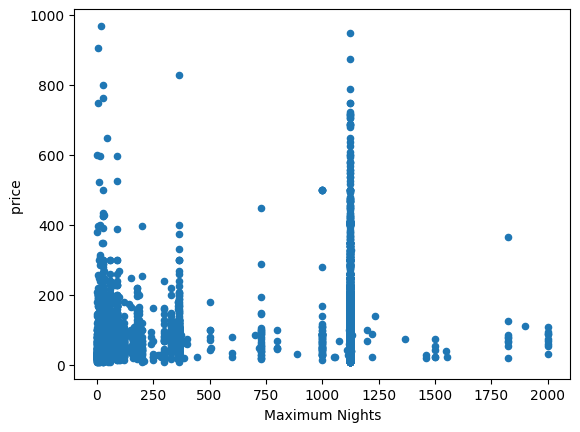

Original: 11809 // Modificado: 11788
Diferencia: 21
Variación: 0.177830%


In [220]:
# Maximum Nights: Observamos que podria tener outliers filtramos a menos de 2000
airbnb_data_no_outliers_Maximum_Nights = airbnb_data_train[airbnb_data_train['Maximum Nights'] <= 2000]

airbnb_data_no_outliers_Maximum_Nights.plot(kind = 'scatter', x='Maximum Nights',y = 'Price')
plt.xlabel('Maximum Nights')
plt.ylabel('price ')
plt.show()

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Maximum_Nights.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Maximum_Nights.shape[0]}'
)
print(f'Variación: {((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Maximum_Nights.shape[0])/airbnb_data_train.shape[0])*100:2f}%')

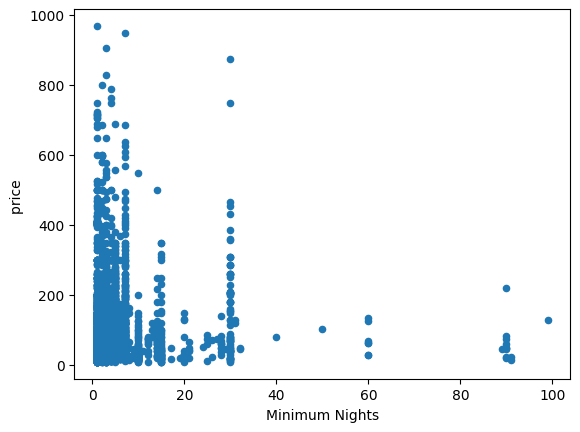

Original: 11809 // Modificado: 11799
Diferencia: 10
Variación: 0.084681%


In [221]:
# Minimum Nights: Observamos que podria tener outliers filtramos a menos de 100
airbnb_data_no_outliers_Minimum_Nights = airbnb_data_train[airbnb_data_train['Minimum Nights'] <= 100]

airbnb_data_no_outliers_Minimum_Nights.plot(kind = 'scatter', x='Minimum Nights',y = 'Price')
plt.xlabel('Minimum Nights')
plt.ylabel('price ')
plt.show()

print(
    f'Original: {airbnb_data_train.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_Minimum_Nights.shape[0]}\nDiferencia: {airbnb_data_train.shape[0] - airbnb_data_no_outliers_Minimum_Nights.shape[0]}'
)
print(f'Variación: {((airbnb_data_train.shape[0] - airbnb_data_no_outliers_Minimum_Nights.shape[0])/airbnb_data_train.shape[0])*100:2f}%')

### COMBINACION DE CARACTERISTICAS

In [222]:
# combinamos Property Type y Room Type porque pienso que el tipo de propiedad con el tipo de habitacion pueden estar bien relacionados entre si y afecta al precio 
airbnb_data_train['Property_Room_Combination'] = airbnb_data_train['Property Type'] + '_' + airbnb_data_train['Room Type']

# obtenemos el precio por persona como combinacion entre precio y personas
# podemos encontrarnos con casos que esten divididos por 0 en estos casos le ponemos nulo y luego lo imputamos
airbnb_data_train['Price_Guests_Included_Combination'] = np.where(airbnb_data_train['Guests Included'] == 0, 
                                                                 np.nan, 
                                                                 airbnb_data_train['Price'] / airbnb_data_train['Guests Included'])

#airbnb_data_train['Price_Guests_Included_Combination'].isnull().sum() solo detectamos 1 null lo borramos
airbnb_data_train.dropna(subset=['Price_Guests_Included_Combination'], inplace=True)

In [223]:
airbnb_data_train.describe()


,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Price_Guests_Included_Combination
count,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000,11808.000000
mean,40.484881,-3.784188,3.273713,1.282859,1.342056,2.043445,73.716294,1.580708,7.558350,3.110264,961.698848,8.942327,22.937331,39.788787,202.184028,55.087363
std,4.693740,14.020589,2.088565,0.659398,0.900836,1.616033,71.626747,1.153395,11.161138,13.436330,9393.989454,9.332448,19.752932,29.648880,127.975195,64.011187
min,-37.851182,-123.124429,1.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,40.409757,-3.707544,2.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,25.000000
50%,40.419309,-3.700771,3.000000,1.000000,1.000000,2.000000,55.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000,37.500000
75%,40.430751,-3.683973,4.000000,1.000000,2.000000,2.000000,87.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,60.000000
max,55.966912,153.371427,16.000000,8.000000,10.000000,16.000000,969.000000,16.000000,276.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,969.000000


### CODIFICAMOS

In [224]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
# codificamos las variables 

#Neighbourhood Cleansed,Smart Location,Country Code,Geolocation (Target Encoder): Uso este encoder porque al predecir una variable continua las ubicaciones influyen directamente en esa variable.
airbnb_data_train['Neighbourhood Cleansed'] = airbnb_data_train['Neighbourhood Cleansed'].map(airbnb_data_train.groupby('Neighbourhood Cleansed')['Price'].mean())
airbnb_data_train['Smart Location'] = airbnb_data_train['Smart Location'].map(airbnb_data_train.groupby('Smart Location')['Price'].mean())
airbnb_data_train['Country Code'] = airbnb_data_train['Country Code'].map(airbnb_data_train.groupby('Country Code')['Price'].mean())
airbnb_data_train['Property_Room_Combination'] = airbnb_data_train['Property_Room_Combination'].map(airbnb_data_train.groupby('Property_Room_Combination')['Price'].mean())
#Property Type,Room Type,Bed Type(Label Enconding aunque tambien podria usar Target Encoder) 
####IMPORTANTE##### USAR ESTAS MISMAS INSTANCIAS EN EL TEST
le_property_type = LabelEncoder()
le_room_type = LabelEncoder()
le_bed_type = LabelEncoder()

#Cancellation Policy (OrdinalEncoder) utilizo este codificador porque entienfo que cada categoria es un orden
le_cancellation_policy = OrdinalEncoder()

airbnb_data_train['Property Type'] = le_property_type.fit_transform(airbnb_data_train['Property Type'] )
airbnb_data_train['Room Type'] = le_room_type.fit_transform(airbnb_data_train['Room Type'])
airbnb_data_train['Bed Type'] = le_bed_type.fit_transform(airbnb_data_train['Bed Type'])
airbnb_data_train['Cancellation Policy'] = le_cancellation_policy.fit_transform(airbnb_data_train['Cancellation Policy'].values.reshape(-1, 1))


In [225]:
airbnb_data_train.head().T

,0,1,2,3,4
Neighbourhood Cleansed,104.600000,85.710220,37.074074,60.707630,56.000000
Smart Location,66.217095,66.217095,66.217095,66.217095,66.217095
Country Code,71.789869,71.789869,71.789869,71.789869,71.789869
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Property Type,0.000000,0.000000,0.000000,0.000000,0.000000
Room Type,0.000000,0.000000,2.000000,1.000000,1.000000
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000


### MATRIZ DE CORRELACION

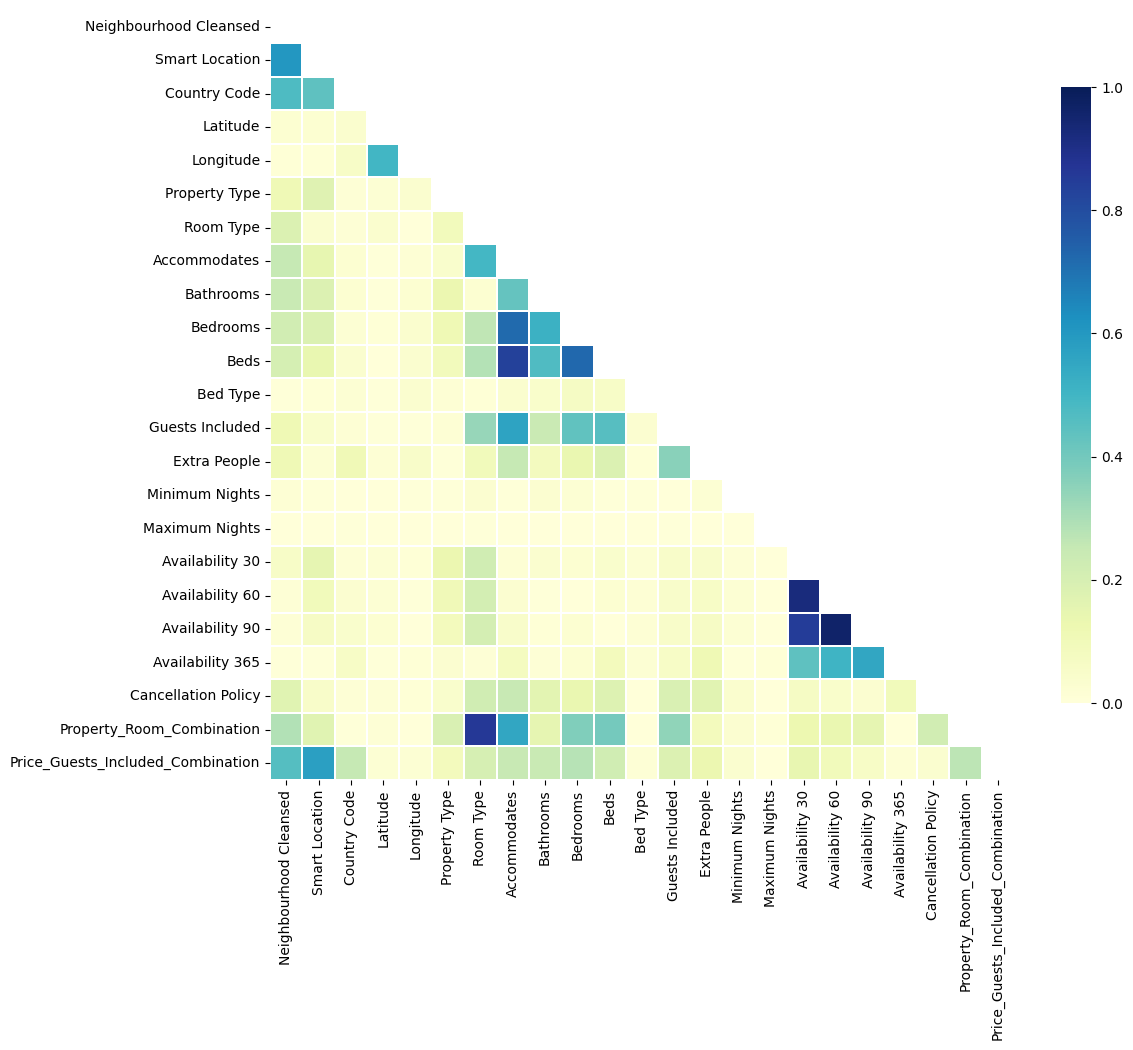

In [227]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_data_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()



- Observamos que la variable **Beds** tiene correlacion alta con **Accommodates**
- Observamos que la variable **Availability 60** tiene alta correlacion con **Availability 30**

In [228]:
# eliminamos las correlaciones y los outliers (Mantenemos room type aunque observamos correlacion)
airbnb_data_train = airbnb_data_train.drop(['Accommodates', 'Availability 60'], axis=1)

airbnb_data_train = airbnb_data_train[airbnb_data_train['Minimum Nights'] <= 100]
airbnb_data_train = airbnb_data_train[airbnb_data_train['Maximum Nights'] <= 2000]
airbnb_data_train = airbnb_data_train[airbnb_data_train['Extra People'] <= 120]

# airbnb_data_train.head().T



## MODELADO Y PRUEBAS

### RESUMEN DE ANALISIS

In [229]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

airbnb_data_train = pd.read_csv("./data/airbnb-listings-extract_train.csv",sep=';', decimal='.') 

airbnb_data_train = airbnb_data_train.drop(['ID','Listing Url','Host URL', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
                                'XL Picture Url', 'Host ID', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood', 'Host Listings Count' ,
                                'Host Total Listings Count', 'Host Verifications', 'Neighbourhood','City', 'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market', 'Country', 'Amenities', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
                                'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
                                'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Reviews per Month', 'Features','Geolocation','Calculated host listings count','Street'], axis=1)

# ELIMINAMOS PRECIOS NULOS
airbnb_data_train = airbnb_data_train.dropna(subset=['Price'])

# IMPUTAMOS
#Bathrooms tiene los siguientes nulos 43 de un total de 11809, imputamos con la moda                         
airbnb_data_train['Bathrooms'].fillna(airbnb_data_train['Bathrooms'].mode()[0], inplace=True)

#Bedrooms tiene los siguientes nulos 20 de un total de 11809, imputamos con la moda       
airbnb_data_train['Bedrooms'].fillna(airbnb_data_train['Bedrooms'].mode()[0], inplace=True)

#Beds tiene los siguientes nulos 36 de un total de 11809, imputamos con la moda                              
airbnb_data_train['Beds'].fillna(airbnb_data_train['Beds'].mode()[0], inplace=True)


# QUITAMOS OUTLIERS
airbnb_data_train = airbnb_data_train[airbnb_data_train['Minimum Nights'] <= 100]
airbnb_data_train = airbnb_data_train[airbnb_data_train['Maximum Nights'] <= 2000]
airbnb_data_train = airbnb_data_train[airbnb_data_train['Extra People'] <= 120]

# CON LA MATRIZ DE CORRELACION ELIMINAMOS CARACTERISTICAS ALTAMENTE CORRELACIONADAS
airbnb_data_train = airbnb_data_train.drop(['Accommodates', 'Availability 60'], axis=1)

# COMBINAMOS CARACTERISTICAS
airbnb_data_train['Property_Room_Combination'] = airbnb_data_train['Property Type'] + '_' + airbnb_data_train['Room Type']
airbnb_data_train['Price_Guests_Included_Combination'] = np.where(airbnb_data_train['Guests Included'] == 0, 
                                                                 np.nan, 
                                                                 airbnb_data_train['Price'] / airbnb_data_train['Guests Included'])

# quitamos las que tienen 0 personas porque no tiene sentido que una casa se alquile para 0 persones
airbnb_data_train.dropna(subset=['Price_Guests_Included_Combination'], inplace=True)

# CODIFICAMOS LAS CARACTERISTICAS

#Neighbourhood Cleansed,Smart Location,Country Code,Geolocation (Target Encoder): Uso este encoder porque al predecir una variable continua las ubicaciones influyen directamente en esa variable.
airbnb_data_train['Neighbourhood Cleansed'] = airbnb_data_train['Neighbourhood Cleansed'].map(airbnb_data_train.groupby('Neighbourhood Cleansed')['Price'].mean())
airbnb_data_train['Smart Location'] = airbnb_data_train['Smart Location'].map(airbnb_data_train.groupby('Smart Location')['Price'].mean())
airbnb_data_train['Country Code'] = airbnb_data_train['Country Code'].map(airbnb_data_train.groupby('Country Code')['Price'].mean())

# nos mejora ligeramente el modelo con la codificacion Target Encoder
airbnb_data_train['Property Type'] = airbnb_data_train['Property Type'].map(airbnb_data_train.groupby('Property Type')['Price'].mean())
airbnb_data_train['Room Type'] = airbnb_data_train['Room Type'].map(airbnb_data_train.groupby('Room Type')['Price'].mean())
airbnb_data_train['Bed Type'] = airbnb_data_train['Bed Type'].map(airbnb_data_train.groupby('Bed Type')['Price'].mean())
airbnb_data_train['Cancellation Policy'] = airbnb_data_train['Cancellation Policy'].map(airbnb_data_train.groupby('Cancellation Policy')['Price'].mean())

airbnb_data_train['Property_Room_Combination'] = airbnb_data_train['Property_Room_Combination'].map(airbnb_data_train.groupby('Property_Room_Combination')['Price'].mean())


# #Property Type,Room Type,Bed Type(Label Enconding aunque tambien podria usar Target Encoder) 
# ####IMPORTANTE##### USAR ESTAS MISMAS INSTANCIAS EN EL TEST
# le_property_type = LabelEncoder()
# le_room_type = LabelEncoder()
# le_bed_type = LabelEncoder()

# #Cancellation Policy (OrdinalEncoder) utilizo este codificador porque entienfo que cada categoria es un orden
# le_cancellation_policy = OrdinalEncoder()

# airbnb_data_train['Property Type'] = le_property_type.fit_transform(airbnb_data_train['Property Type'] )
# airbnb_data_train['Room Type'] = le_room_type.fit_transform(airbnb_data_train['Room Type'])
# airbnb_data_train['Bed Type'] = le_bed_type.fit_transform(airbnb_data_train['Bed Type'])
# airbnb_data_train['Cancellation Policy'] = le_cancellation_policy.fit_transform(airbnb_data_train['Cancellation Policy'].values.reshape(-1, 1))


In [230]:
airbnb_data_test = pd.read_csv("./data/airbnb-listings-extract_test.csv",sep=';', decimal='.') 

airbnb_data_test = airbnb_data_test.drop(['ID','Listing Url','Host URL', 'Scrape ID', 'Last Scraped','Name','Summary','Space','Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
                                'XL Picture Url', 'Host ID', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url','Host Picture Url', 'Host Neighbourhood', 'Host Listings Count' ,
                                'Host Total Listings Count', 'Host Verifications', 'Neighbourhood','City', 'Neighbourhood Group Cleansed', 'State', 'Zipcode', 'Market', 'Country', 'Amenities', 'Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
                                'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
                                'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names', 'Reviews per Month', 'Features','Geolocation','Calculated host listings count','Street'], axis=1)

airbnb_data_test = airbnb_data_test.dropna(subset=['Price'])

# ELIMINAMOS PRECIOS NULOS
airbnb_data_test = airbnb_data_test.dropna(subset=['Price'])

# IMPUTAMOS
#Bathrooms tiene los siguientes nulos 43 de un total de 11809, imputamos con la moda                         
airbnb_data_test['Bathrooms'].fillna(airbnb_data_test['Bathrooms'].mode()[0], inplace=True)

#Bedrooms tiene los siguientes nulos 20 de un total de 11809, imputamos con la moda       
airbnb_data_test['Bedrooms'].fillna(airbnb_data_test['Bedrooms'].mode()[0], inplace=True)

#Beds tiene los siguientes nulos 36 de un total de 11809, imputamos con la moda                              
airbnb_data_test['Beds'].fillna(airbnb_data_test['Beds'].mode()[0], inplace=True)

# QUITAMOS OUTLIERS
airbnb_data_test = airbnb_data_test[airbnb_data_test['Minimum Nights'] <= 100]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Maximum Nights'] <= 2000]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Extra People'] <= 120]

# CON LA MATRIZ DE CORRELACION ELIMINAMOS CARACTERISTICAS ALTAMENTE CORRELACIONADAS
airbnb_data_test = airbnb_data_test.drop(['Accommodates', 'Availability 60'], axis=1)

# COMBINAMOS CARACTERISTICAS
airbnb_data_test['Property_Room_Combination'] = airbnb_data_test['Property Type'] + '_' + airbnb_data_test['Room Type']
airbnb_data_test['Price_Guests_Included_Combination'] = np.where(airbnb_data_test['Guests Included'] == 0, 
                                                                 np.nan, 
                                                                 airbnb_data_test['Price'] / airbnb_data_test['Guests Included'])
# quitamos las que tienen 0 personas porque no tiene sentido que una casa se alquile para 0 persones
airbnb_data_test.dropna(subset=['Price_Guests_Included_Combination'], inplace=True)

# CODIFICAMOS 
# Neighbourhood Cleansed,Smart Location,Country Code,Geolocation (Target Encoder): Uso este encoder porque al predecir una variable continua las ubicaciones influyen directamente en esa variable.
airbnb_data_test['Neighbourhood Cleansed'] = airbnb_data_test['Neighbourhood Cleansed'].map(airbnb_data_test.groupby('Neighbourhood Cleansed')['Price'].mean())
airbnb_data_test['Smart Location'] = airbnb_data_test['Smart Location'].map(airbnb_data_test.groupby('Smart Location')['Price'].mean())
airbnb_data_test['Country Code'] = airbnb_data_test['Country Code'].map(airbnb_data_test.groupby('Country Code')['Price'].mean())

# nos mejora ligeramente el modelo con la codificacion Target Encoder
airbnb_data_test['Property Type'] = airbnb_data_test['Property Type'].map(airbnb_data_test.groupby('Property Type')['Price'].mean())
airbnb_data_test['Room Type'] = airbnb_data_test['Room Type'].map(airbnb_data_test.groupby('Room Type')['Price'].mean())
airbnb_data_test['Bed Type'] = airbnb_data_test['Bed Type'].map(airbnb_data_test.groupby('Bed Type')['Price'].mean())
airbnb_data_test['Cancellation Policy'] = airbnb_data_test['Cancellation Policy'].map(airbnb_data_test.groupby('Cancellation Policy')['Price'].mean())

airbnb_data_test['Property_Room_Combination'] = airbnb_data_test['Property_Room_Combination'].map(airbnb_data_test.groupby('Property_Room_Combination')['Price'].mean())

# airbnb_data_test['Property Type'] = le_property_type.fit_transform(airbnb_data_test['Property Type'] )
# airbnb_data_test['Room Type'] = le_room_type.fit_transform(airbnb_data_test['Room Type'])
# airbnb_data_test['Bed Type'] = le_bed_type.fit_transform(airbnb_data_test['Bed Type'])
# airbnb_data_test['Cancellation Policy'] = le_cancellation_policy.fit_transform(airbnb_data_test['Cancellation Policy'].values.reshape(-1, 1))


In [231]:
from sklearn.preprocessing import StandardScaler

X_train = airbnb_data_train.drop('Price', axis=1)  
y_train = airbnb_data_train['Price'] 

X_test = airbnb_data_test.drop('Price', axis=1)  
y_test = airbnb_data_test['Price']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regresion lineal 

In [232]:
from sklearn.linear_model import LinearRegression

# probamos con una regresion lineal simple 

lr = LinearRegression().fit(X_train_scaled, y_train)

print(f"R cuadrado { lr.score(X_train_scaled, y_train)}")


R cuadrado 0.9213873482632962


### Lasso y Ridge

best parameters: {'alpha': 10.0}


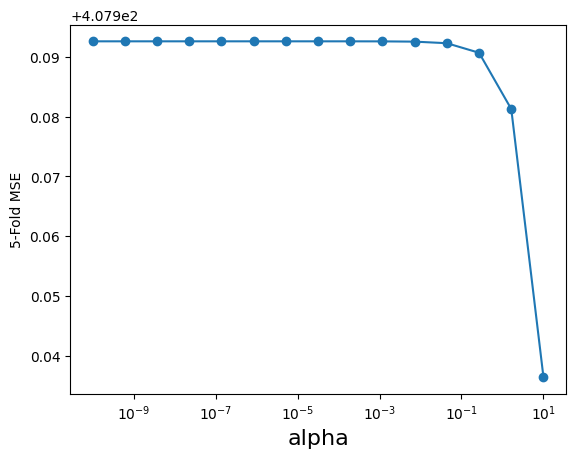

MSE: 444.2470149743154
RMSE: 21.07716809664703


In [233]:
# RIDGE
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(-10,1,15)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train_scaled, y_train)
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((0, 5))
plt.show()


# calculamos el error cuadratico medio 
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")



best parameters: {'alpha': 0.04393970560760786}


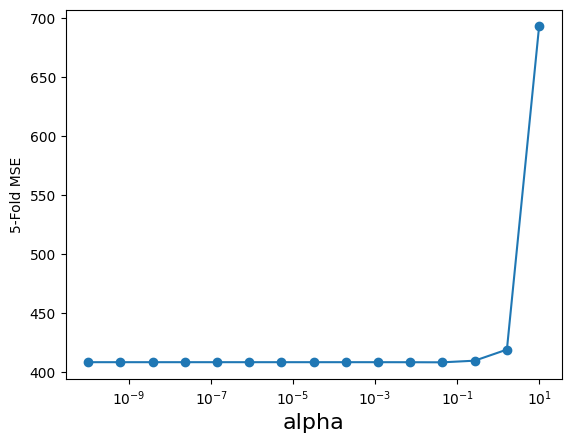

MSE: 444.2289719322319
RMSE: 21.0767400689061


In [234]:
# Lasso 
alpha_vector = np.logspace(-10,1,15)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(X_train_scaled, y_train)
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

### Arbol de decision individual con validacion cruzada

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END .......................................

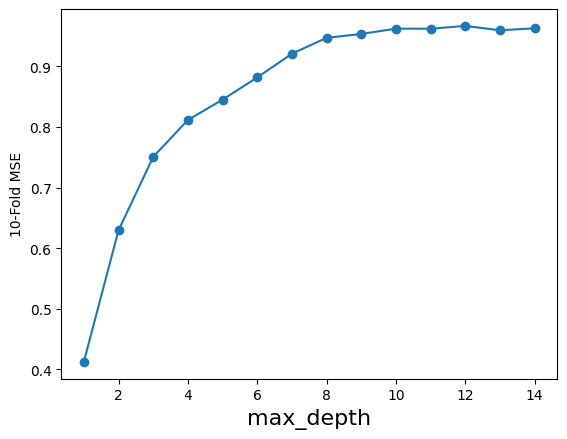

In [235]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [236]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=6).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.9359507272467503
Test:  0.8943455959503221


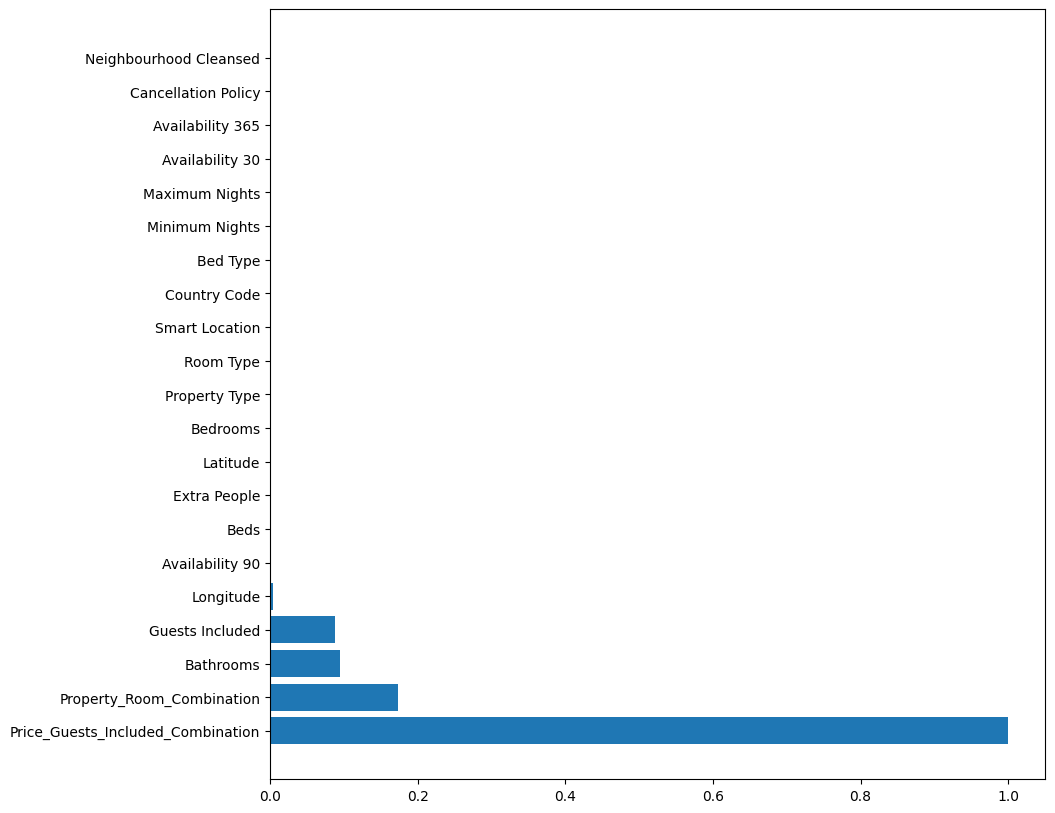

In [237]:
feature_names = X_train.columns

importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### Random forest con validacion cruzada 

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ......................max_depth=1, n_estimators=400; total time=   0.7s
[CV] END ......................max_depth=1, n_estimators=400; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=400; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=400; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=400; total time=   0.7s
[CV] END ......................max_depth=1, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=1, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=1, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=1, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=1, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=2, n_estimators=400; total time=   1.0s
[CV] END ......................max_depth=2, n_e

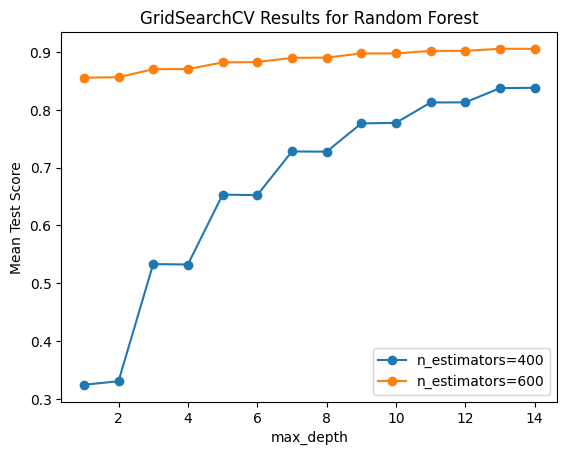

In [66]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth, 'n_estimators': [400,600]}

grid = GridSearchCV(RandomForestRegressor(random_state=0, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])

for i, n_estimator in enumerate([400, 600]):
    plt.plot(maxDepth, scores[i*len(maxDepth):(i+1)*len(maxDepth)], '-o', label=f'n_estimators={n_estimator}')

plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('GridSearchCV Results for Random Forest')
plt.legend()
plt.show()


In [75]:
maxDepthOptimo = grid.best_params_['max_depth']
estimatorOptimo = grid.best_params_['n_estimators']
# ajusto un poco la profundidad porque tenia un poco de overfiting con 14 
randomForest = RandomForestRegressor(max_depth=9,n_estimators=estimatorOptimo,max_features='sqrt').fit(X_train_scaled,y_train)

print("Train: ",randomForest.score(X_train_scaled,y_train))
print("Test: ",randomForest.score(X_test_scaled,y_test))

Train:  0.9279624627234933
Test:  0.8845724350045329


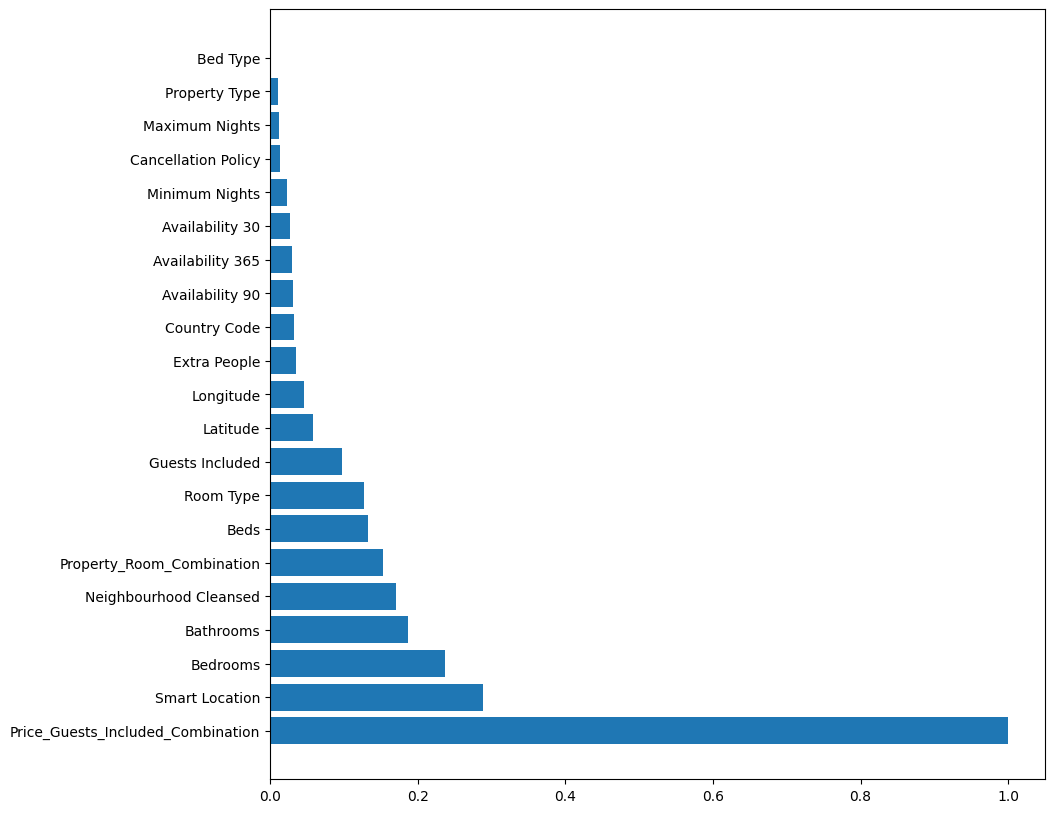

In [76]:
feature_names = X_train.columns
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### Boosted Tree con validacion cruzada

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   9.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   9.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   9.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  18.2s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.9s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=  17.9s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  27.0s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  26.9s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  26.9s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  35.9s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  35.9s
[CV] END ...............learning_rate=0.1, n_esti

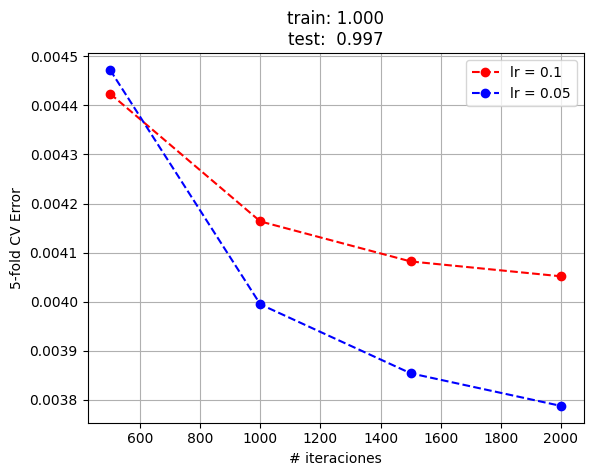

In [79]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [86]:

# tiende a sobreajuste con los mejores parametros, pruebo con distintos para ver si mejora 
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=1, n_estimators=600, learning_rate=0.05).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

# con estos datos generaliza mejor el modelo pero aun asi no me convence estos resultados

Train:  0.9368907757816441
Test:  0.9324733860361131


### BaggingRegressor

#### Arboles de decision

In [ ]:
from sklearn.ensemble import BaggingRegressor

max_depth_vector = range(1,15)
param_grid = {'estimator__max_depth': max_depth_vector, 'n_estimators': [50,100,200]}

grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0)),
    scoring= 'neg_mean_squared_error',
    param_grid=param_grid,
    cv = 5,
    verbose=2
).fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


In [194]:
# best mean cross-validation score: -70.404
#best parameters: {'estimator__max_depth': 13, 'n_estimators': 200}

maxDepthOptimo = grid.best_params_['estimator__max_depth']
n_estimators = grid.best_params_['n_estimators']
baggingModel = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=7),
    n_estimators=100
).fit(X_train_scaled,y_train)

print("Train: ", baggingModel.score(X_train_scaled,y_train))
print("Test: ", baggingModel.score(X_test_scaled,y_test))


Train:  0.9739470097036433
Test:  0.9596797074506503


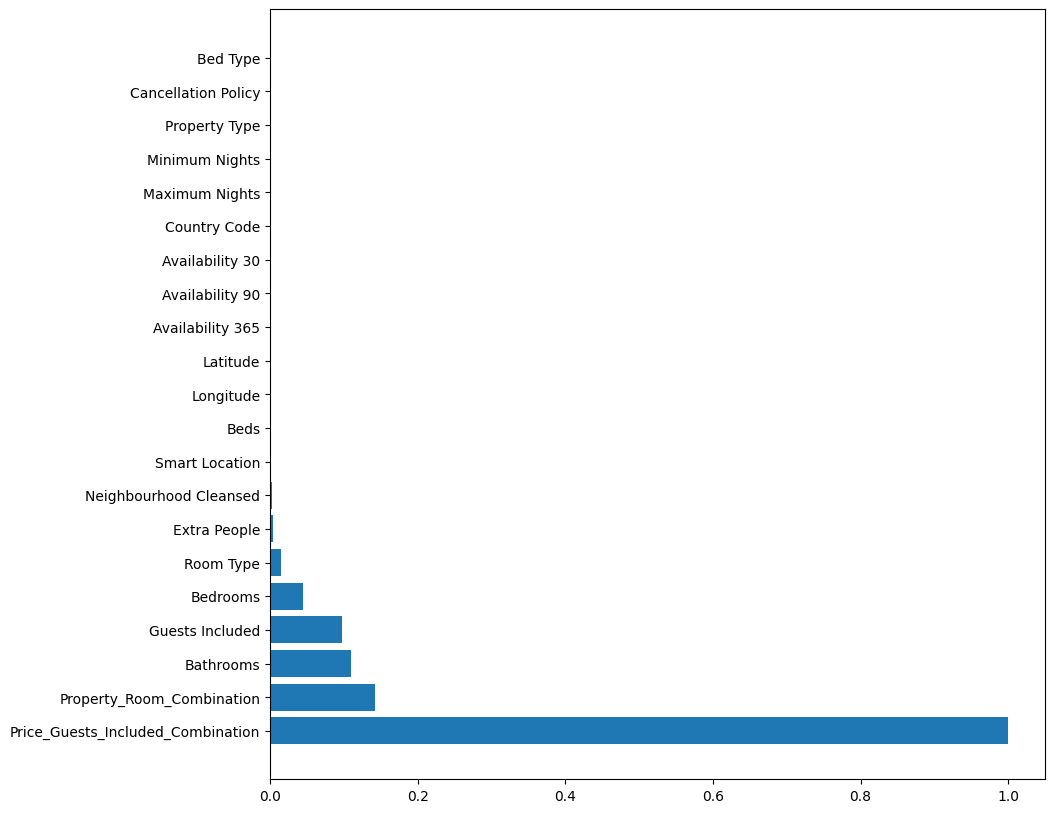

In [195]:
# no me cuadra mucho la importancia de las variables
importances = np.mean([tree.feature_importances_ for tree in baggingModel.estimators_], axis=0)
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

### XGBoost con validación cruzada

In [ ]:
# !pip install xgboost

In [ ]:
# probamos el modelo con XGBoost para ver sus resultados
from xgboost import XGBRegressor

maxDepth = range(1,13)
param_grid = {'max_depth': maxDepth, 'n_estimators': [400,600], 'learning_rate': [0.005,0.01, 0.1, 0.3]}

grid_search = GridSearchCV(XGBRegressor(random_state=0), param_grid=param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2)
grid_search.fit(X_train,y_train)


In [203]:
print(f"MSE: {grid_search.best_score_}")
rmse = np.sqrt(-grid_search.best_score_)  # Recuerda que el MSE es negativo
print(f"RMSE: {rmse}")

print(f"Mejores parametros: {grid_search.best_params_}")


MSE: -71.53712298758482
RMSE: 8.457962106062242
Mejores parametros: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 600}


In [204]:
# probamos el modelo con los mejores parametros
bt = XGBRegressor(random_state=0, n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], learning_rate=grid_search.best_params_['learning_rate']).fit(X_train,y_train)

print("Train: ",bt.score(X_train,y_train))
print("Test: ",bt.score(X_test,y_test))

# con los mejores vemos sobreajuste, voy a proceder a hacer cambios para mejorarlo
bt_mejorado = XGBRegressor(random_state=0, n_estimators=400, max_depth=3, learning_rate=0.005).fit(X_train,y_train)

print("Train: ",bt_mejorado.score(X_train,y_train))
print("Test: ",bt_mejorado.score(X_test,y_test))


Train:  0.9996851905571347
Test:  0.9893884714496186
Train:  0.9072142592561856
Test:  0.8877946671226907


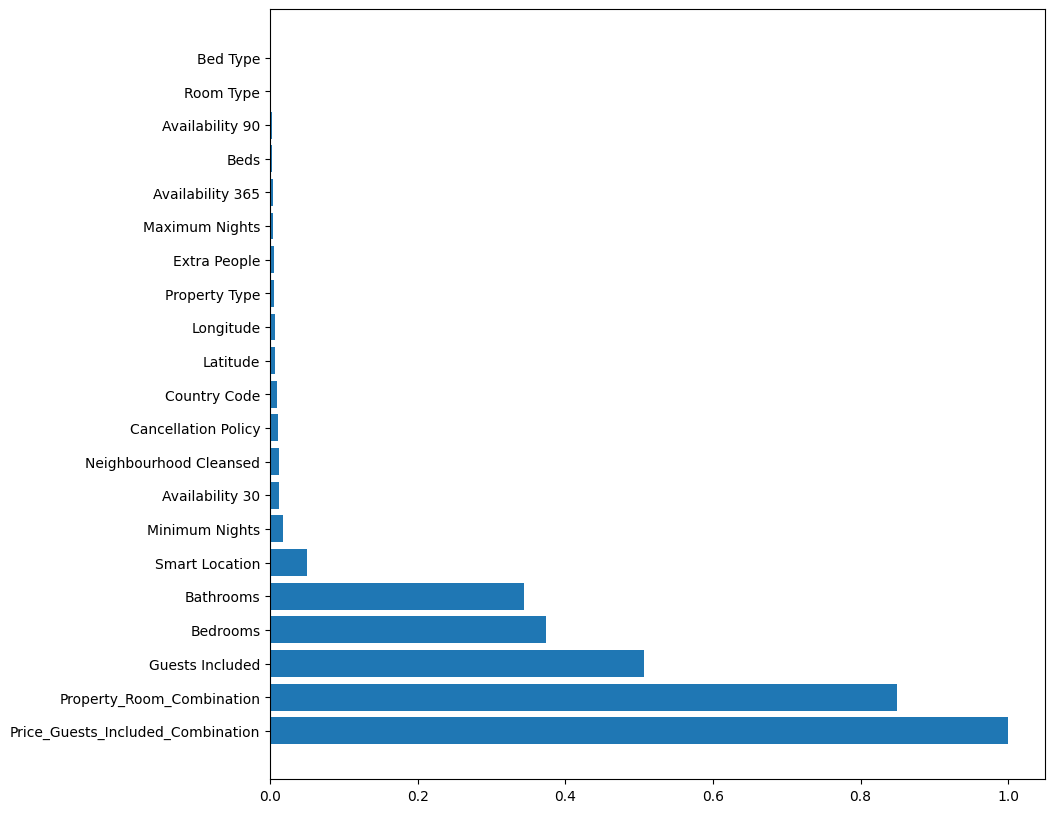

In [206]:
feature_names = X_train.columns
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

# Resumen de la Práctica de Machine Learning

**Análisis de datos**: Durante el análisis, descarté la mayoría de las características, ya sea porque contenían demasiados valores nulos o porque no eran relevantes para el modelo en su estado actual. Algunas características podrían ser útiles si se aplicara procesamiento de lenguaje natural.También mantuve algunas variables, como *Bed Type*, que no mostraron relevancia significativa en los modelos, pero eliminarlas no mejoró sustancialmente el rendimiento del modelo.

**Combinación de características**: Tras combinar varias características, finalmente me quedé con las dos más relevantes: *Property_Room_Combination* y *Price_Guests_Included_Combination*. Esta última, *Price_Guests_Included_Combination*, fue la que arrojó los mejores resultados, mostrando una tendencia clara y favorable al evaluarla gráficamente, como se puede observar en la sección de "Búsqueda de outliers".

**Modelos utilizados**: Probé varios modelos para predecir los precios, pero decidí quedarme con XGBRegressor debido a los resultados obtenidos, con un RMSE de 8.46, que considero satisfactorios. Sin embargo, observé cierto overfitting en el modelo, por lo que reduje la complejidad para mejorar la capacidad de generalización.

**Modelos alternativos**: También experimenté con otros modelos como Random Forest y GradientBoostingRegressor, que lograron buenos resultados y podrían ser alternativas viables para futuros ajustes y optimizaciones.
